## Практическое занятие 5
## Математический анализ
## Численное решение нелинейных уравнений: nsolve
https://docs.sympy.org/latest/modules/solvers/solvers.html?highlight=nsolve#sympy.solvers.solvers.nsolve

#### Уравнение в форме $f(x)=0$

In [1]:
import numpy as np
import sympy
from sympy import nsolve
import matplotlib.pyplot as plt
%matplotlib inline

### Задача 1
Решить уравнение $𝑥^4−e^x=0$ при $-2 \le x \le 2$, построить график левой части, отметить точки пересечения с осью ОХ.

ConditionSet(x, Eq(x**4 - exp(x), 0), Complexes)

Решения:


-0.815553418808961

1.42961182472556

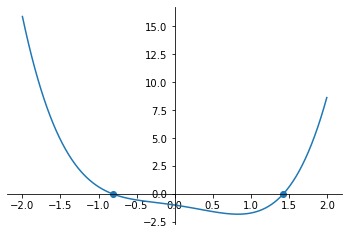

In [2]:
import numpy as np
import sympy
from sympy import *
import matplotlib.pyplot as plt
%matplotlib inline
def f(x):
  return x**4-E**x
x,y,z = symbols("x y z")
display(solveset(f(x)))
X = np.linspace(-2, 2, 100)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
roots= solve(f(x))[:2]
y_coord = [0]*len(roots)
ax.scatter(roots, y_coord)
ax.plot(X, f(X))
print("Решения:")
display(nsolve(x**4 - E**x,x, -2))
display(nsolve(x**4 - E**x,x, 2))

### Задача 2.
Решить уравнение $\sin^2(2x)=\ln x$ при $0< x \le 3$. Построить графики левой и правой части, отметить точку пересечения графиков.

Решения:


<ipython-input-3-5d75602423f0>:4: RuntimeWarning: divide by zero encountered in log
  return np.log(x)


1.30133323382849

2.08594344788353

2.50217038800416

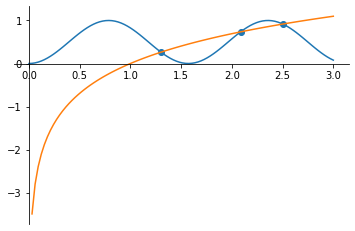

In [3]:
def f(x):
  return np.sin(2*x) ** 2
def g(x):
  return np.log(x)
X = np.linspace(0, 3, 100)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
roots = [sympy.nsolve(sympy.Eq(sin(2*x) ** 2, log(x)), x,
 interval) for interval in [1, 2, 2.7]]
y_coord = [f(float(root)) for root in roots]
ax.scatter(roots, y_coord)

ax.plot(X, f(X))
ax.plot(X, g(X))
print("Решения:")
display(nsolve(sin(2*x) ** 2 - log(x),x, 1))
display(nsolve(sin(2*x) ** 2 - log(x),x, 2))
display(nsolve(sin(2*x) ** 2 - log(x),x, 2.7))

### Задача 3.
Решить уравнение $\sin^2(2x^2-7x+6)=3/4$ на $[3, 4]$. Построить графики левой и правой части, отметить точки пересечения графиков.

Решения:


3.21863715818210

3.38722138942523

3.68072303274915

3.81186570968780

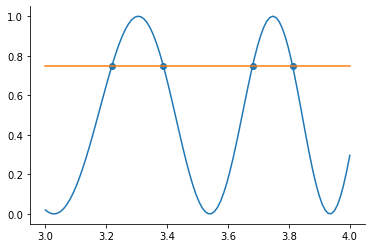

In [4]:
def f(x):
  return np.sin(2*(x**2) - 7*x + 6) ** 2
def g(x):
  return x*0 + (3/4)
X = np.linspace(3, 4, 100)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
roots = [sympy.nsolve(sympy.Eq(sin(2*(x**2) - 7*x + 6) ** 2, g(x)), x,
 interval) for interval in [3, 3.3, 3.5,3.7]]
y_coord = [f(float(root)) for root in roots]
ax.scatter(roots, y_coord)

ax.plot(X, f(X))
ax.plot(X, g(X))
print("Решения:")
display(nsolve(sin(2*x**2-7*x+6) ** 2-3/4, x, 3))
display(nsolve(sin(2*x**2-7*x+6) ** 2-3/4, x, 3.3))
display(nsolve(sin(2*x**2-7*x+6) ** 2-3/4, x, 3.5))
display(nsolve(sin(2*x**2-7*x+6) ** 2-3/4, x, 3.7))

### Задача 4.
Решить уравнение ${\rm tg}^4(2x^2+1)-10=0$ на интервале $[0, 0.2]$ методом дихотомии. График строить не нужно.

In [5]:
def f(x, lib='sympy'):
 if lib == 'sympy':
  return sympy.tan(2*(x**2) + 1)**4 - 10
 if lib == 'numpy':
  return np.tan(2*(x**2) + 1)**4 - 10
 return 'error'

from sympy.abc import x
 
roots = [sympy.nsolve(sympy.Eq(f(x, lib='sympy')), x, x0) for x0 in [0, 0.2]]
roots

C:\ProgramData\Anaconda3\lib\site-packages\sympy\core\relational.py:495: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  SymPyDeprecationWarning(


[0.171066377483446, 0.171066377483446]

### Задача 5.
Решить систему уравнений 
$$
\left\{\begin{matrix}
(x - 1)^2 + (y - 2)^2 + (z + 3)^2 = 25\\
x + y + z = 0\\
-2x + 3y - z = 7
\end{matrix}\right.
$$
начальное приближение (0, 0, 0).
Проверить подстановкой.

In [6]:
def f(x, y, z):
  return (x - 1)**2 + (y - 2)**2 + (z + 3)**2
def g(x, y, z):
  return x + y + z
def h(x, y, z):
  return(-2*x + 3*y - z)
root = sympy.nsolve((sympy.Eq(f(x, y, z), 25), sympy.Eq(g(x, y, z), 0), sympy.Eq(h(x, y, z), 7)), (x, y, z), (0, 0, 0))
display(root)
x0, y0, z0 = root
f(x0, y0, z0) == 25 and round(g(x0, y0, z0)) == 0 and h(x0, y0, z0) == 7

Matrix([
[-2.08606699924184],
[ 1.22848325018954],
[0.857583749052298]])

True

Хорасанджян Левон, вариант №157